# NAME : AYUSH SINGH

# We are provided with a small dataset of 25 records and we are to study the relationship between the numbers of hours a student studies vs the percentage of marks He/She gets and finally predict the marks of a student if He/She studies for 9.25 hours in a day.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
df=pd.read_csv("http://bit.ly/w-data")
df.head() # Showing first 5 coloumns of the data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
#statistical information of data
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
#check if there is any null value

df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [10]:
# Finding correlation among the data infact this data set is very small

correlation= df.corr(method='pearson')
correlation

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


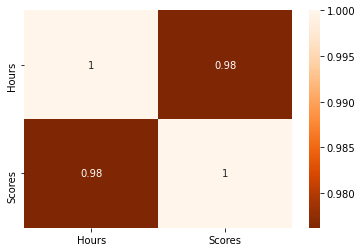

In [11]:
sns.heatmap(correlation, annot=True, cmap='Oranges_r');


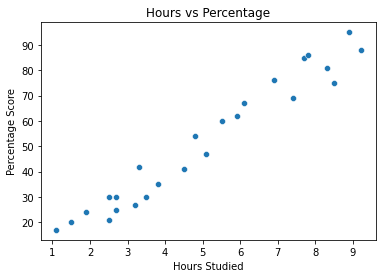

In [12]:
# plotting a scatterplot to represent the correlation
sns.scatterplot(x='Hours', y='Scores', data=df)
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

# The above graph shows a clear positive linear correlation between Hours Studied and Percentage Scores


# Prepairing the data for distribution into the test and train dataset to develop our model.

In [13]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20, random_state=0)

# Training The Model 

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

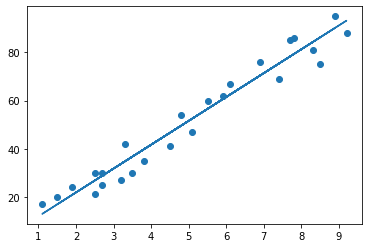

In [18]:
# Plotting a scatterplot for X and y
line=regressor.coef_*X+regressor.intercept_
plt.scatter(X,y)
plt.plot(X,line)
plt.show()

# Model Prediction

In [19]:
X_test


array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [20]:
y_pred=regressor.predict(X_test) #Scores Prediction


In [21]:
# Comparing Actual vs Predicted Scores
df_Compared = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df_Compared

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


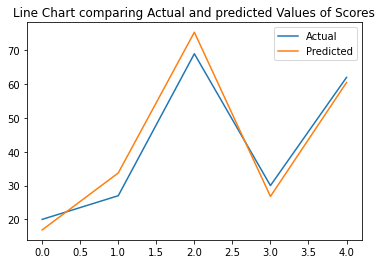

In [22]:
df_Compared.Actual.plot()
df_Compared.Predicted.plot()
plt.title('Line Chart comparing Actual and predicted Values of Scores')
plt.legend();

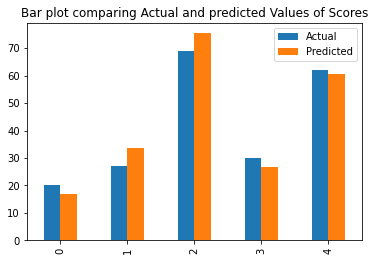

In [23]:
df_Compared.plot(kind='bar')
plt.title('Bar plot comparing Actual and predicted Values of Scores');


# Checking for Performance Metrics

In [24]:
from sklearn import metrics

In [25]:

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2:', metrics.r2_score(y_true=y_test, y_pred=y_pred))

MAE: 4.183859899002975
MSE: 21.598769307217406
RMSE: 4.647447612100367
r2: 0.9454906892105355


# Finally Our model prediction is completed, and its accuracy is 94.55% which is quite good.